In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt, mpld3
# import matplotlib
# mpld3.enable_notebook()

In [2]:
import scipy

### Utility functions

In [19]:
# Utility functions

from scipy.optimize import curve_fit

def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[ max(y), mean, sigma])
    return popt, pcov

def normal_gauss(x,A,x0,sigma):
    return A/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_fit_to_spectrum(input_x,input_y,x1,x2, angle):
    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]
    [A, x0, sigma],pcov = gauss_fit(xdata, ydata)
    # offset, amplitude, center, sigma
    
    [A_err, x0_err, sigma_err] = np.sqrt(np.diag(pcov))
    print( [A_err, x0_err, sigma_err])
    # Plot input spectra with correct scaling
    plt.plot(input_x*m+b,input_y, label='Subtracted Spectra')
    
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')
    
    # Plot fitted gaussian to peak
    plt.plot(input_x*m+b, gauss(input_x, A, x0, sigma), '--r', label='Fit')
#     plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()
    return np.array([x0*m+b,A,sigma,x0_err,A_err,sigma_err])

### Calibrations and background

In [8]:
# Calibration
m = 0.8741586926259176
b = -10.031221336877318
# Changed Gain
m_new = 0.8398160567649131
b_new = -9.016848123325374

# Load Background
background =np.loadtxt('Calibrations/BackgroundRadiation40gain610volts120sec.Spe',skiprows=12, max_rows=1023)

In [9]:
# Backgrounds for each angle
calibration_files = glob.glob('Calibrations/CesiumNoTarget*.Spe')
calibrations = {}

for f in calibration_files:
    angle = f.split('CesiumNoTarget')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    calibrations[angle] = entry

calibrations['0'] = {'Calibrations/BackgroundRadiation40gain610volts120sec.Spe':f, 'time':120,'data':background}

In [10]:
calibrations

{'50': {'filename': 'Calibrations\\CesiumNoTarget50degrees40gain610volts420sec.Spe',
  'time': '420',
  'data': array([ 0.,  0.,  0., ..., 12., 17., 17.])},
 '70': {'filename': 'Calibrations\\CesiumNoTarget70degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 22., 33., 25.])},
 '90': {'filename': 'Calibrations\\CesiumNoTarget90degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 35., 24., 22.])},
 '110': {'filename': 'Calibrations\\CesiumNoTarget110degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 24., 33., 19.])},
 '130': {'filename': 'Calibrations\\CesiumNoTarget130degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 29., 25., 20.])},
 '150': {'filename': 'Calibrations\\CesiumNoTarget150degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 23., 32., 27.])},
 '30': {'filename': 'Calibrations\\CesiumNoTarget30d

NameError: name 'bins' is not defined

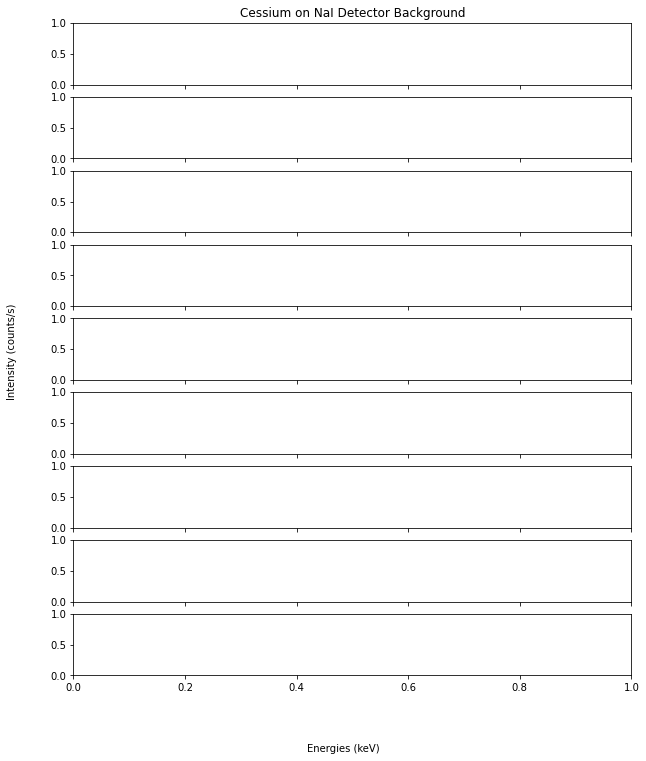

In [11]:
f, axes = plt.subplots(9, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Cessium on NaI Detector Background')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.04, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles = ['10','15','30','50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,calibrations[angles[i]]['data']/int(calibrations[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.8,0.5), xycoords='axes fraction')
    
    
    

# Lead

In [12]:
# Load files

pb_files = glob.glob('Cesium_Lead/*.Spe')
cesium_cs_pb_dict = {}

for f in pb_files:
    angle = f.split('CesiumPb')[1].split('degrees')[0]
    time = int(f.split('volts')[1].split('sec')[0])
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    cesium_cs_pb_dict[angle] = entry

In [13]:
# Select compton peaks to fit 

cesium_cs_pb_dict['0']['x1'] = 650
cesium_cs_pb_dict['0']['x2'] = 850

cesium_cs_pb_dict['5']['x1'] = 650
cesium_cs_pb_dict['5']['x2'] = 850

cesium_cs_pb_dict['10']['x1'] = 700
cesium_cs_pb_dict['10']['x2'] = 750

cesium_cs_pb_dict['15']['x1'] = 650
cesium_cs_pb_dict['15']['x2'] = 750

# cesium_cs_pb_dict['20']['x1'] = 600
# cesium_cs_pb_dict['20']['x2'] = 800

# cesium_cs_pb_dict['25']['x1'] = 600
# cesium_cs_pb_dict['25']['x2'] = 800

cesium_cs_pb_dict['30']['x1'] = 600
cesium_cs_pb_dict['30']['x2'] = 700

cesium_cs_pb_dict['50']['x1'] = 450
cesium_cs_pb_dict['50']['x2'] = 550

cesium_cs_pb_dict['70']['x1'] = 370
cesium_cs_pb_dict['70']['x2'] = 450

cesium_cs_pb_dict['90']['x1'] = 300
cesium_cs_pb_dict['90']['x2'] = 350

cesium_cs_pb_dict['110']['x1'] = 250
cesium_cs_pb_dict['110']['x2'] = 300

# cesium_cs_pb_dict['130']['x1'] = 150
# cesium_cs_pb_dict['130']['x2'] = 300

# cesium_cs_pb_dict['150']['x1'] = 150
# cesium_cs_pb_dict['150']['x2'] = 300

In [14]:
np.sum(calibrations['10']['data']/int(calibrations['10']['time'])), np.sum(cesium_cs_pb_dict['10']['data']/int(cesium_cs_pb_dict['10']['time']))

(1876.2880952380951, 1320.6750000000002)

[0.08188452772794516, 0.19702665120135954, 0.19707436145402993]


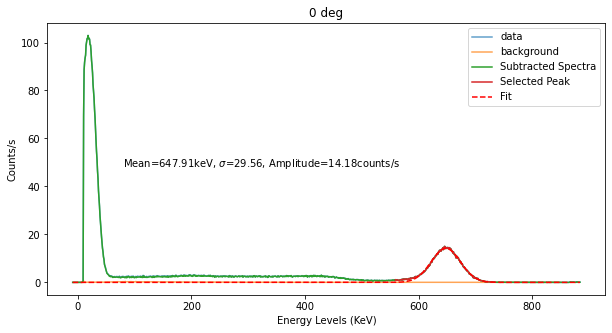

[0.03249975573075929, 0.3599913665078362, 0.5313553473370682]


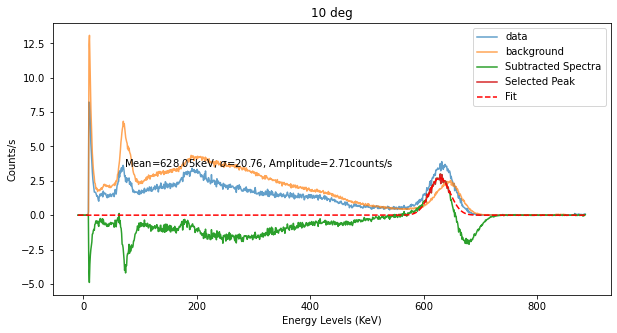

[0.013917155204378518, 0.7745975015948899, 0.8542213501401944]


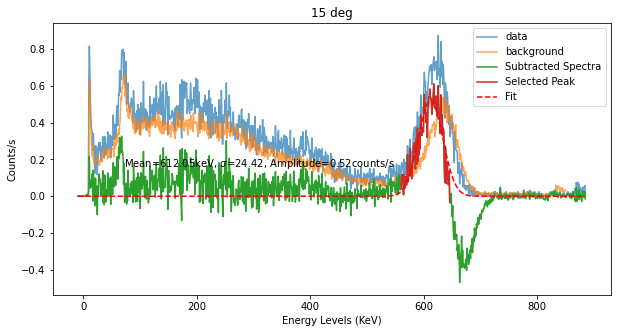

[0.005154981486362845, 1.301303817292989, 1.9018316428758746]


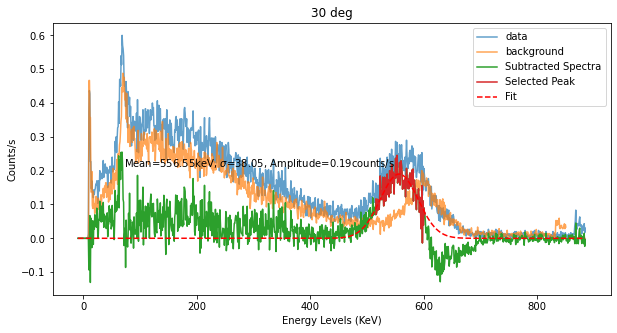

[0.0033486083562356255, 2.529782700864878, 2.8511075970785305]


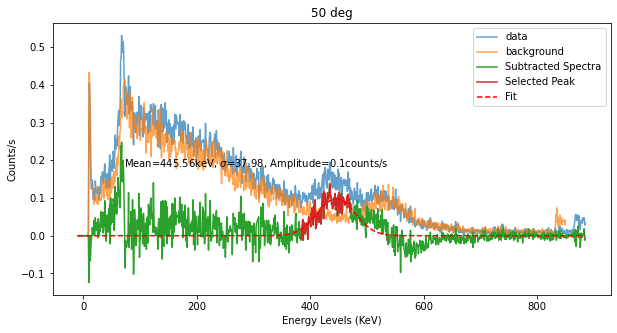

[0.0034744456716920536, 1.767383833192157, 2.3320419566095767]


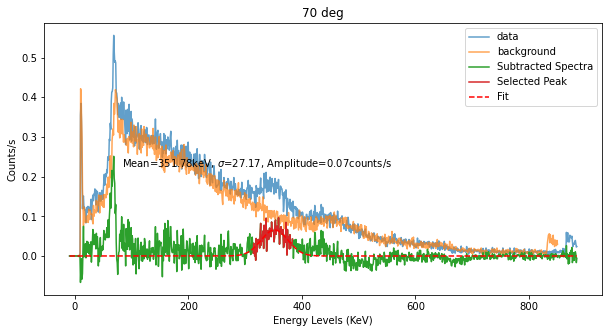

[0.004934834291607773, 7.162079254611495, 7.804923323124628]


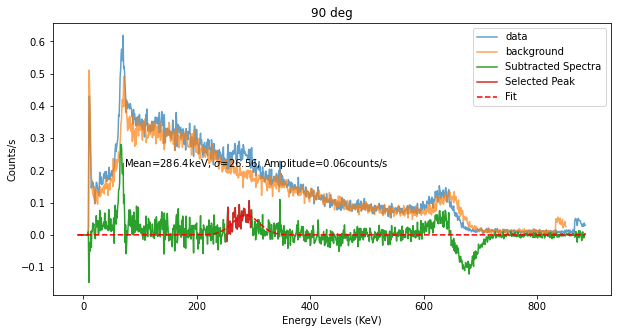

[0.008229503018325793, 1.9409886926423887, 2.2347184752908396]


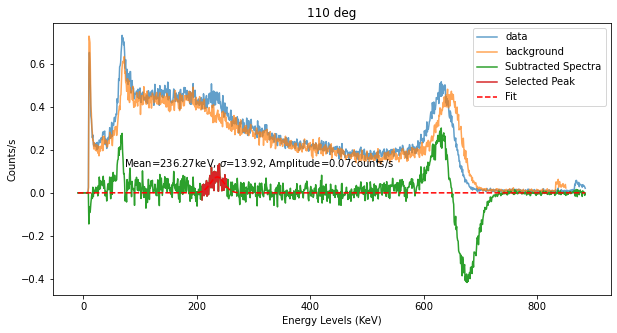

In [15]:
bins = np.linspace(1,1023,1023)
plt.rcParams['figure.figsize'] = [10, 5]
pb_data = []

%matplotlib inline
for angle in ['0','10','15','30','50','70','90','110']:
    normalized_data = cesium_cs_pb_dict[angle]['data']/int(cesium_cs_pb_dict[angle]['time']) #calibrations[angle]['data']/np.sum(calibrations[angle]['data'])
    normalized_bg = calibrations[angle]['data']/int(calibrations[angle]['time']) #cesium_cs_pb_dict[angle]['data']/np.sum(cesium_cs_pb_dict[angle]['data'])
    
    # Plot data and background with correct energy scaling
    plt.figure(figsize = (10,5))
    plt.plot(bins*m+b,normalized_data,label='data',alpha=0.7)
    plt.plot(bins*m_new+b_new,normalized_bg,label='background',alpha=0.7)
    plt.legend()
    
    # Fit gaussian to peak and plot peak
    x1 = cesium_cs_pb_dict[angle]['x1']
    x2 = cesium_cs_pb_dict[angle]['x2']
    scale = np.sum(cesium_cs_pb_dict[angle]['data'])
    spectrum = (normalized_data - normalized_bg)
    pb_data.append(np.append(np.array([int(angle),int(cesium_cs_pb_dict[angle]['time'])]),gauss_fit_to_spectrum(bins,spectrum,x1,x2, angle)))

        
#     spectrum = cesium_cs_pb_dict[angle]['data']/int(cesium_cs_pb_dict[angle]['time']) - calibrations[angle]['data']/int(calibrations[angle]['time'])
#     plt.plot(bins*m+b,normalized_data*scale, label = angle + ' deg')
#     plt.plot(bins*m_new+b_new,normalized_bg*scale, label = 'background')
#     plt.plot(bins*m_new+b_new,normalized_data*scale-normalized_bg*scale, label = 'background')
#     plt.title(angle + ' deg')


In [16]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [20]:
angle='70'
normalized_data = cesium_cs_pb_dict[angle]['data']/int(cesium_cs_pb_dict[angle]['time']) #calibrations[angle]['data']/np.sum(calibrations[angle]['data'])
normalized_bg = calibrations[angle]['data']/int(calibrations[angle]['time']) #cesium_cs_pb_dict[angle]['data']/np.sum(cesium_cs_pb_dict[angle]['data'])

# Plot data and background with correct energy scaling
plt.figure(figsize = (10,5))
plt.plot(bins*m+b,normalized_data,label='Scaled Spectra',alpha=0.7)
plt.plot(bins*m_new+b_new,normalized_bg,label='Scaled Background',alpha=0.7)
plt.legend()

# Fit gaussian to peak and plot peak
x1 = cesium_cs_pb_dict[angle]['x1']
x2 = cesium_cs_pb_dict[angle]['x2']
scale = np.sum(cesium_cs_pb_dict[angle]['data'])
spectrum = (normalized_data - normalized_bg)
pb_data.append(np.append(np.array([int(angle),int(cesium_cs_pb_dict[angle]['time'])]),gauss_fit_to_spectrum(bins,spectrum,x1,x2, angle)))
plt.tight_layout()

[0.0034744456716920536, 1.767383833192157, 2.3320419566095767]


In [253]:
pb_data


[array([0.00000000e+00, 1.20000000e+02, 6.47906074e+02, 1.41836775e+01,
        2.95571313e+01, 1.97026651e-01, 8.18845277e-02, 1.97074361e-01]),
 array([1.00000000e+01, 1.20000000e+02, 6.28052615e+02, 2.71425970e+00,
        2.07648855e+01, 3.59991367e-01, 3.24997557e-02, 5.31355347e-01]),
 array([1.50000000e+01, 1.20000000e+02, 6.12053045e+02, 5.21462047e-01,
        2.44168454e+01, 7.74597502e-01, 1.39171552e-02, 8.54221350e-01]),
 array([3.00000000e+01, 3.00000000e+02, 5.56554560e+02, 1.90083024e-01,
        3.80503781e+01, 1.30130382e+00, 5.15498149e-03, 1.90183164e+00]),
 array([5.00000000e+01, 4.20000000e+02, 4.45561375e+02, 9.82575147e-02,
        3.79848224e+01, 2.52978270e+00, 3.34860836e-03, 2.85110760e+00]),
 array([7.00000000e+01, 8.40000000e+02, 3.51777308e+02, 6.55426220e-02,
        2.71684936e+01, 1.76738383e+00, 3.47444567e-03, 2.33204196e+00]),
 array([9.00000000e+01, 8.40000000e+02, 2.86398230e+02, 6.17908544e-02,
        2.65552647e+01, 7.16207925e+00, 4.93483429e-

In [254]:
angles_cs_pb, times_cs_pb, shifts_cs_pb, As_cs_pb, sigmas_cs_pb, shifts_err_cs_pb, As_err_cs_pb, sigmas_err_cs_pb = np.transpose(np.array(pb_data))


In [256]:
len(As_cs_pb)

8

Text(0.5, 1.0, 'Cesium Source Lead Scattering Target')

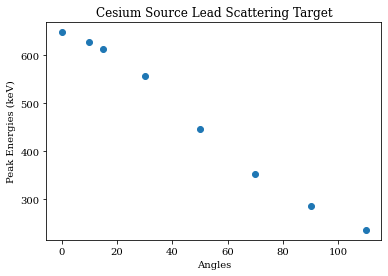

In [218]:
plt.figure()
plt.plot(angles_cs_pb, shifts_cs_pb,'o')
plt.xlabel('Angles')
plt.ylabel('Peak Energies (keV)')
plt.title('Cesium Source Lead Scattering Target')

Text(0.5, 1.0, 'Cesium Source Lead Scattering Target')

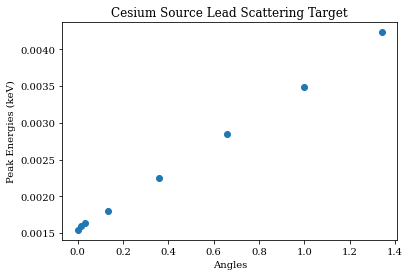

In [219]:
plt.figure()
plt.plot(1-np.cos(np.radians(angles_cs_pb)), 1/shifts_cs_pb,'o')
plt.xlabel('Angles')
plt.ylabel('Peak Energies (keV)')
plt.title('Cesium Source Lead Scattering Target')

#### Compare to theoretical value

In [220]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})

In [221]:
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 662 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,120,120)
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

m_cs_pb,b_cs_pb = np.polyfit(1-np.cos(np.radians(angles_cs_pb)), 1/(shifts_cs_pb), 1)

plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_cs_pb)), 1/(shifts_cs_pb),yerr=(shifts_err_cs_pb/shifts_cs_pb**2),fmt='o',markersize = 10,label='Data')
plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts * keV,label='Theoretical Values')
plt.plot(1-np.cos(np.radians(thetas)), (1-np.cos(np.radians(thetas)))*m_cs_pb+b_cs_pb, '--',label='Data Fit')
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_cs_pb),(0.6,0.002))
plt.title('Cesium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()

# Aluminum

In [200]:
# Read files
al_files = glob.glob('Cesium_Aluminum/*.Spe')
cesium_cs_al_dict = {}

for f in al_files:
    angle = f.split('CesiumAl')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    cesium_cs_al_dict[angle] = entry

In [201]:
# Select compton peaks to fit 

cesium_cs_al_dict['0']['x1'] = 790
cesium_cs_al_dict['0']['x2'] = 855

# cesium_cs_al_dict['5']['x1'] = 780
# cesium_cs_al_dict['5']['x2'] = 850

cesium_cs_al_dict['10']['x1'] = 700
cesium_cs_al_dict['10']['x2'] = 760

cesium_cs_al_dict['15']['x1'] = 600
cesium_cs_al_dict['15']['x2'] = 750

cesium_cs_al_dict['20']['x1'] = 600
cesium_cs_al_dict['20']['x2'] = 800

cesium_cs_al_dict['25']['x1'] = 600
cesium_cs_al_dict['25']['x2'] = 800

cesium_cs_al_dict['30']['x1'] = 580
cesium_cs_al_dict['30']['x2'] = 720

cesium_cs_al_dict['50']['x1'] = 450
cesium_cs_al_dict['50']['x2'] = 600

cesium_cs_al_dict['70']['x1'] = 350
cesium_cs_al_dict['70']['x2'] = 500

cesium_cs_al_dict['90']['x1'] = 300
cesium_cs_al_dict['90']['x2'] = 370

cesium_cs_al_dict['110']['x1'] = 250
cesium_cs_al_dict['110']['x2'] = 300

cesium_cs_al_dict['130']['x1'] = 200
cesium_cs_al_dict['130']['x2'] = 300

cesium_cs_al_dict['150']['x1'] = 200
cesium_cs_al_dict['150']['x2'] = 250

In [324]:
f, axes = plt.subplots(9, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Cessium 137 Source Scattered on Aluminum Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.04, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles = ['10','15','30','50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,cesium_cs_al_dict[angles[i]]['data']/int(cesium_cs_al_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.8,0.5), xycoords='axes fraction')

In [327]:
f, axes = plt.subplots(10, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Cessium 137 Source Scattered on Lead Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.04, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles =['0','10','15','30','50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,cesium_cs_pb_dict[angles[i]]['data']/int(cesium_cs_al_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.8,0.5), xycoords='axes fraction')

[0.03922793541585954, 0.6389287551176215, 0.8100449025793245]


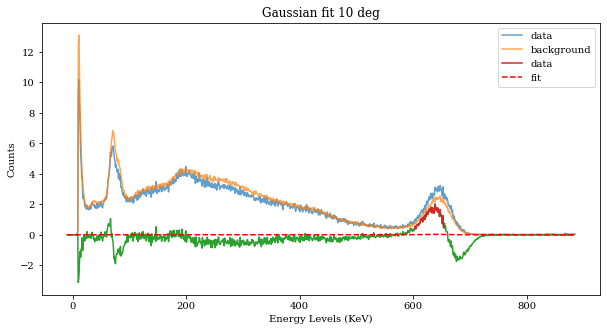

[0.011875575631028899, 0.7903031022732732, 0.8791378405611127]


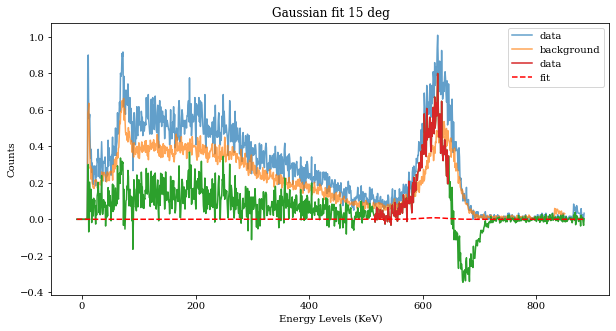

[0.00544054910227486, 0.6498060542543797, 0.6770946562049335]


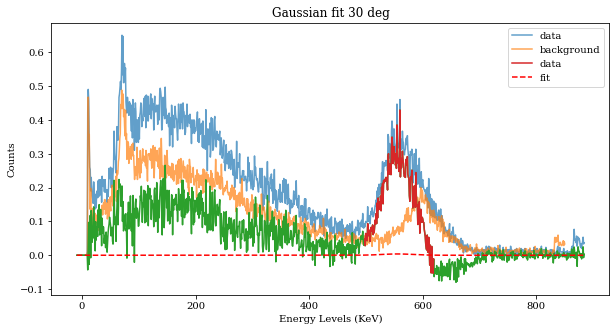

[0.004904736687872398, 0.6791667429688031, 0.7225073119397981]


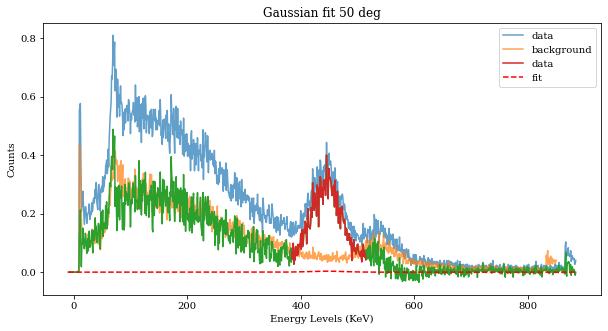

[0.0036615938190740064, 0.6823141289858167, 0.7116604815264908]


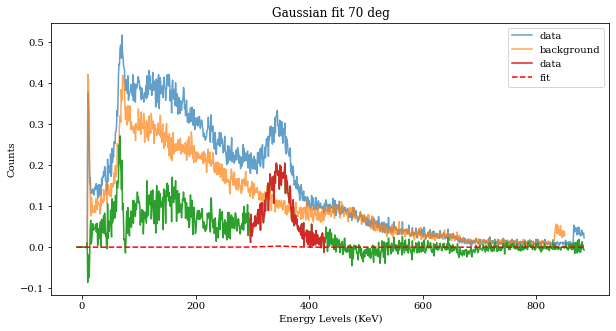

[0.005955511078812769, 0.6600821671592203, 0.8001908224421937]


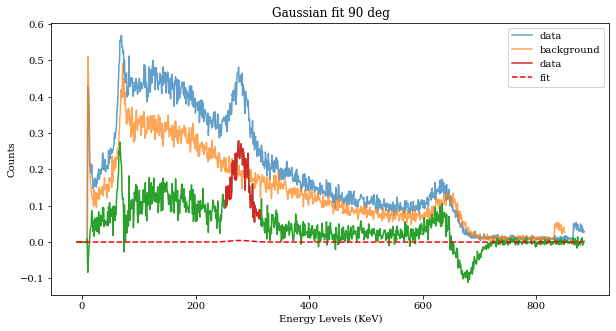

[0.00858412455001948, 0.6045204987862668, 0.8827464453350434]


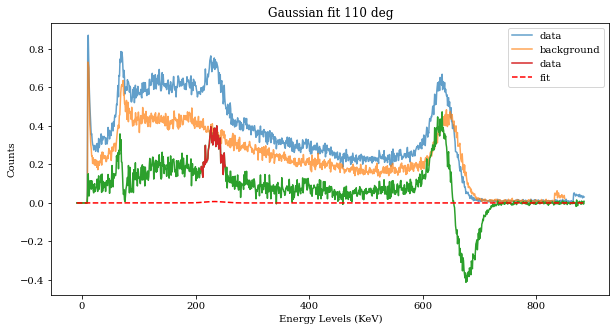

[0.016412556469111248, 1.0099652263589345, 1.009973784654916]


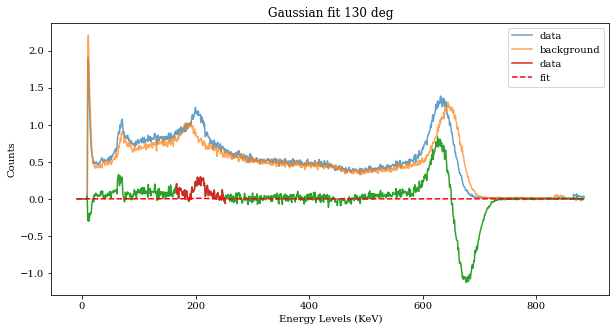

[0.018173894530129967, 0.6270052902710411, 0.7884666215598384]


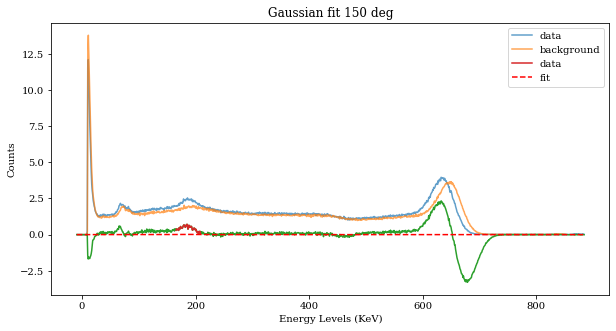

In [273]:
bins = np.linspace(1,1023,1023)
plt.rcParams['figure.figsize'] = [10, 5]
al_data = []

%matplotlib inline
for angle in ['10','15','30','50','70','90','110','130','150']:
    normalized_data = cesium_cs_al_dict[angle]['data']/int(cesium_cs_al_dict[angle]['time'])
    normalized_bg = calibrations[angle]['data']/int(calibrations[angle]['time']) 
    
    bins = np.linspace(1,1023,1023)
    plt.figure(figsize = (10,5))
    plt.plot(bins*m+b,normalized_data,label='data',alpha=0.7)
    plt.plot(bins*m_new+b_new,normalized_bg,label='background',alpha=0.7)
    plt.legend()
    
    x1 = cesium_cs_al_dict[angle]['x1']
    x2 = cesium_cs_al_dict[angle]['x2']
    spectrum = (normalized_data - normalized_bg)
    al_data.append(np.append(np.array([int(angle),int(cesium_cs_al_dict[angle]['time'])]),gauss_fit_to_spectrum(bins,spectrum,x1,x2, angle)))



In [275]:
angles_cs_al, times_cs_al, shifts_cs_al, As_cs_al, sigmas_cs_al, shifts_err_cs_al, As_err_cs_al, sigmas_err_cs_al = np.transpose(np.array(al_data))

In [276]:
%matplotlib qt
plt.figure()
plt.plot(1-np.cos(np.radians(angles_cs_al)), 1/(shifts_cs_al),'o')
plt.xlabel('Angles')
plt.ylabel('1/E')
plt.title('Cesium Source Aluminum Scattering Target')

Text(0.5, 1.0, 'Cesium Source Aluminum Scattering Target')

In [386]:
plt.figure(figsize=(10,5))
plt.errorbar(angles_cs_al, shifts_cs_al,yerr=shifts_err_cs_al,fmt='o', markersize = 10, label='Aluminum',alpha = 0.7)
plt.errorbar(angles_cs_pb, shifts_cs_pb,yerr=shifts_err_cs_pb,fmt='o', markersize = 10, label='Lead',alpha=0.7)
plt.xlabel('Angles (degrees)')
plt.ylabel('Peak Energy (keV)')
plt.title('Cesium Source Scattering')
plt.legend()
plt.tight_layout()

#### Compare to theoretical value

In [238]:
%matplotlib qt
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "serif"

In [239]:
plt.errorbar(angles_cs_al, shifts_cs_al,yerr = np.sqrt(shifts_cs_al),fmt='o',markersize = 5, label = 'Data')

<ErrorbarContainer object of 3 artists>

In [240]:
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 662 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,180,180)
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

m_cs_al,b_cs_al = np.polyfit(1-np.cos(np.radians(angles_cs_al)), 1/(shifts_cs_al), 1)

plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_cs_al)), 1/(shifts_cs_al),yerr=(shifts_err_cs_al/shifts_cs_al**2),fmt='o',markersize = 10,label='Data')
plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts * keV, label = 'Theoretical Values')
plt.plot(1-np.cos(np.radians(thetas)), (1-np.cos(np.radians(thetas)))*m_cs_al+b_cs_al, '--', label = 'Data Fit')
plt.xlabel(r'1-cos$\theta$')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_cs_al),(0.6,0.002))
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()

## Cross Section

In [358]:
re = 2.818e-13 #cm classical radiums of the electron
keV_g = 1.602176634e-9 #g cm^2/s^2 = erg
speed_of_light_cm = 29979245800 #cm/s
mass_of_electron = 9.10938356e-31 #kg
mass_of_electron_g = 9.10938356e-28 #kg
# plank = 6.62607004e-34
compton_wavelength = 2.42631023867e-12 #m
compton_wavelength_cm = 2.42631023867e-10 #cm


r = 25.5 #cm, distance from target to detector
h_target = 7.7 #cm
d_target = 1.9 #cm
crystal_area = 5.08 * 5.08 #cm**2

N0 = 6e23 #Avogadro's number
# What is the Cs's Currie?
I0 = 3.7e10 * 3.69e-3 / (4 * np.pi * r**2) # 1/(cm^2 s)

A_al = 26.9 #atomic weight of aluminum
A_pb = 207.2 #atomic weight of Lead
Z_al = 13 #atomic number of aluminum
Z_pb = 82 #atomic number of Lead

rho_al = 2.7 #g/cm^3
rho_pb = 11.35 #g/cm^3

N_al = np.pi * ( d_target / 2) **2 * h_target * rho_al * N0 / A_al * Z_al
N_pb = np.pi * ( d_target / 2) **2 * h_target * rho_pb * N0 / A_pb * Z_pb


In [359]:
def Klein_Nishina(E0, theta):
    a = E0 * keV_g / (mass_of_electron_g *  speed_of_light_cm ** 2) # should be 1.29 for 662 keV
    cos = np.cos(np.radians(theta))
    return (re ** 2) * ((1+cos**2) / 2) * ( 1 / (1 + a * (1-cos)) **2 ) * (1 + a**2*(1-cos)**2 / (1+cos**2) / (1 + a*(1-cos)))

def Klein_Nishina_Etheta(E0, E_theta, theta):
    PE = E_theta/E0
    return 1 / 2 * re ** 2 * PE ** 2 * (  PE + 1/PE - np.sin(np.radians(theta)) ** 2)

def Compton_Energy(E0, theta):
    return 1 / (E0) + 1 / (mass_of_electron_g *  speed_of_light_cm ** 2) * (1-np.cos(np.radians(theta)))


#### Theoretical values using Klein-Nishina

In [360]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [361]:
shifts_cs_al

array([634.13864976, 619.56568214, 555.64918586, 444.90820679,
       344.66153226, 277.92511311, 232.64067765, 208.04285182,
       183.32719397])

In [378]:
# %matplotlib inline
thetas = np.linspace(0,180,180)
diff_cross_secs = Klein_Nishina(662, thetas)

# plt.figure(figsize=(20,10))
plt.figure(figsize=(12,6))
plt.plot(np.radians(angles_cs_al), Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al),'o',markersize = 10, alpha=0.5, label = 'Aluminum Target')
plt.plot(np.radians(angles_cs_pb), Klein_Nishina_Etheta(662, shifts_cs_pb , angles_cs_pb),'o',markersize = 10, alpha=0.5,label = 'Lead Target' )
plt.plot(np.radians(thetas), diff_cross_secs)

plt.title('Differential Cross Section of Scattered Cesium')
plt.xlabel('Angles (radians)')
plt.ylabel('Differential Cross Section ($cm^2/sr$)')
plt.legend()
plt.tight_layout()
# plt.plot(thetas, 1 / E_thetas,'o')

#### Measured Values

In [363]:
1/ ( (crystal_area / r ** 2) * N_al * I0)

8.823099475327666e-29

In [368]:
np.mean(np.array(As_cs_al) / Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al))

2.0433117484452264e+25

In [382]:
%matplotlib qt

plt.figure(figsize=(12,6))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_cs_al,np.array(As_cs_al),yerr=As_err_cs_al,fmt='o',label='Measured')
plt.plot(angles_cs_al, Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al)*2.04e25,'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
plt.plot(thetas, diff_cross_secs*2.04e25)

plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()



In [381]:
%matplotlib qt

plt.figure(figsize=(12,6))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_cs_al,np.array(As_cs_al),yerr=As_err_cs_al,fmt='o',label='Measured')
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()

# plt.figure(figsize=(10,5))
# plt.plot(angles_cs_al, Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al),'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Cesium Source Aluminum Scattering Target')
# plt.legend()


plt.figure(figsize=(12,6))
# plt.plot(angles_cs_pb,np.array(As_cs_pb) /As_cs_pb[0] / ((crystal_area / r ** 2) * N_pb * I0),'o',label='Measured')
plt.errorbar(angles_cs_pb,np.array(As_cs_pb),yerr=As_err_cs_pb,fmt='o',label='Measured')
# plt.plot(thetas, diff_cross_secs)
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()


# plt.figure(figsize=(10,5))
# plt.plot(angles_cs_pb, Klein_Nishina_Etheta(662, shifts_cs_pb , angles_cs_pb),'o',markersize = 10, alpha=0.5,label = 'Klein-Nishina' )
# # plt.plot(thetas, diff_cross_secs)
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Cesium Source Lead Scattering Target')
# plt.legend()

[1050.8508087515488,
 141.27680739010123,
 31.91553977651065,
 18.129767919321225,
 9.355474279302785,
 4.463538691287209,
 4.113057393290237,
 2.5847410852455677]